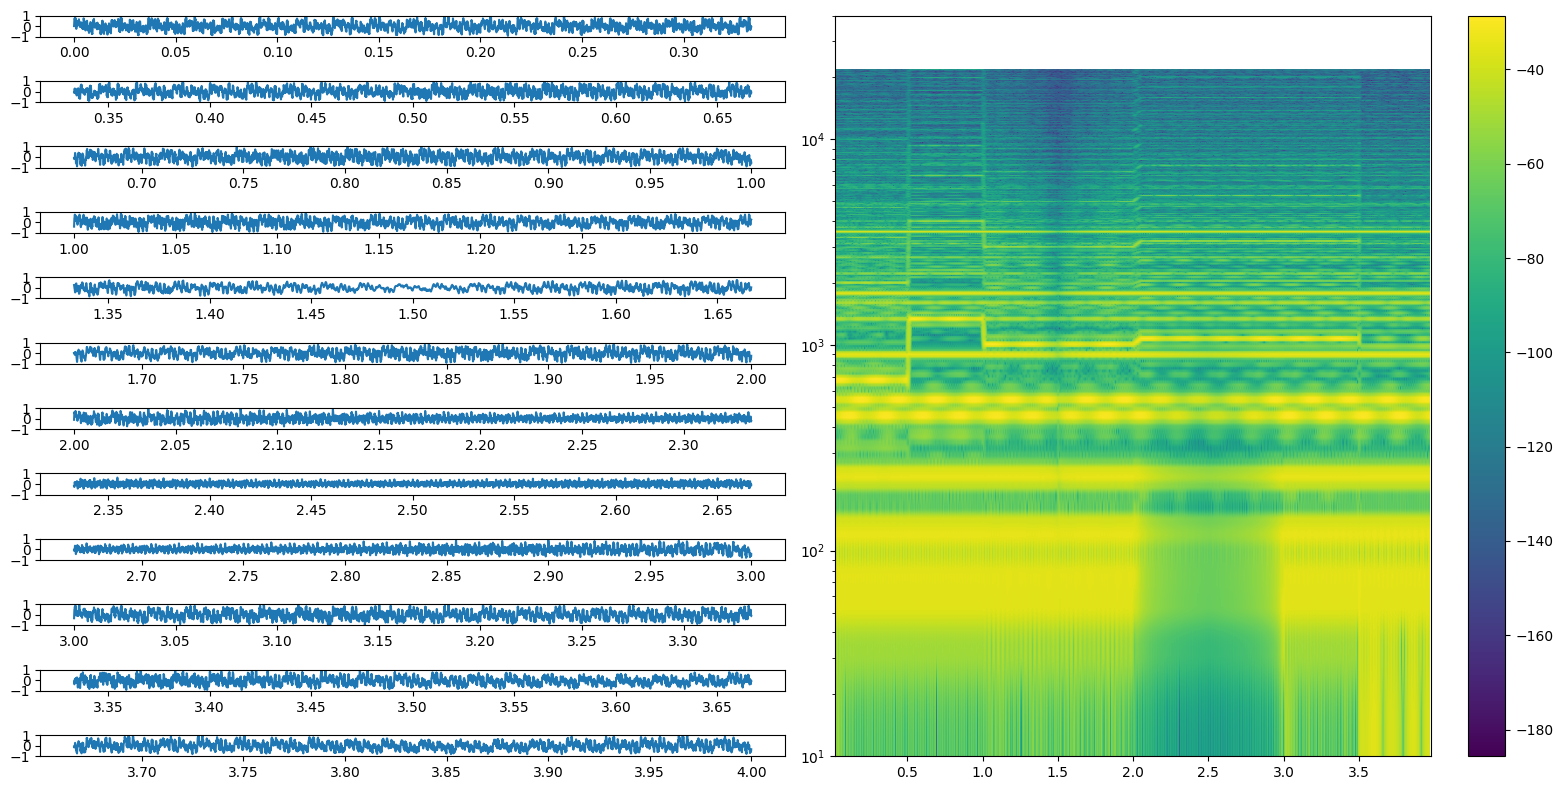

In [1]:
from pywavenum import waveforms as wg
s = wg.Clip(
    (
        wg.Clip(wg.Sine(440), -6 * (1 + 0.8 * wg.Sine(4.1, 0.3))).gain(-9)
        + wg.Clip(wg.Sine(440 * 6 / 5), -6 * (1 + 0.8 * wg.Sine(4))).gain(-9)
        + wg.Clip(wg.Sine(
            440 * 3 / 2 * wg.PiecewiseLinear(
                [0.0, 0.5, 0.51, 1.0, 1.01, 2.0, 2.05, 3.5],
                [1.0, 1.0, 2.00, 2.0, 1.50, 1.5, 1.60, 1.6],
            )
        ), -6 * (1 + 0.8 * wg.Sine(3.9, 0.6))).gain(-9)
    ),
    -7.5, softness=0.2
).gain(3)
s = sum([
    wg.Sine(f).gain(-16) for f in [440 / 8, 440 / 4, 440 / 2, 440 * 2, 440 * 4, 440 * 8]
], s)
s = wg.LPF(s, wg.PiecewiseLinear([1.0, 1.5, 2.0], [22000.0, 1000.0, 22000.0], extend=True))
s = wg.HPF(s, wg.PiecewiseLinear([2.0, 2.5, 3.0], [22.0, 10000.0, 22.0], extend=True))
s = wg.Limiter(s)

fig = s.visualize(tmax=4)
s.to_audio(tmax=4)

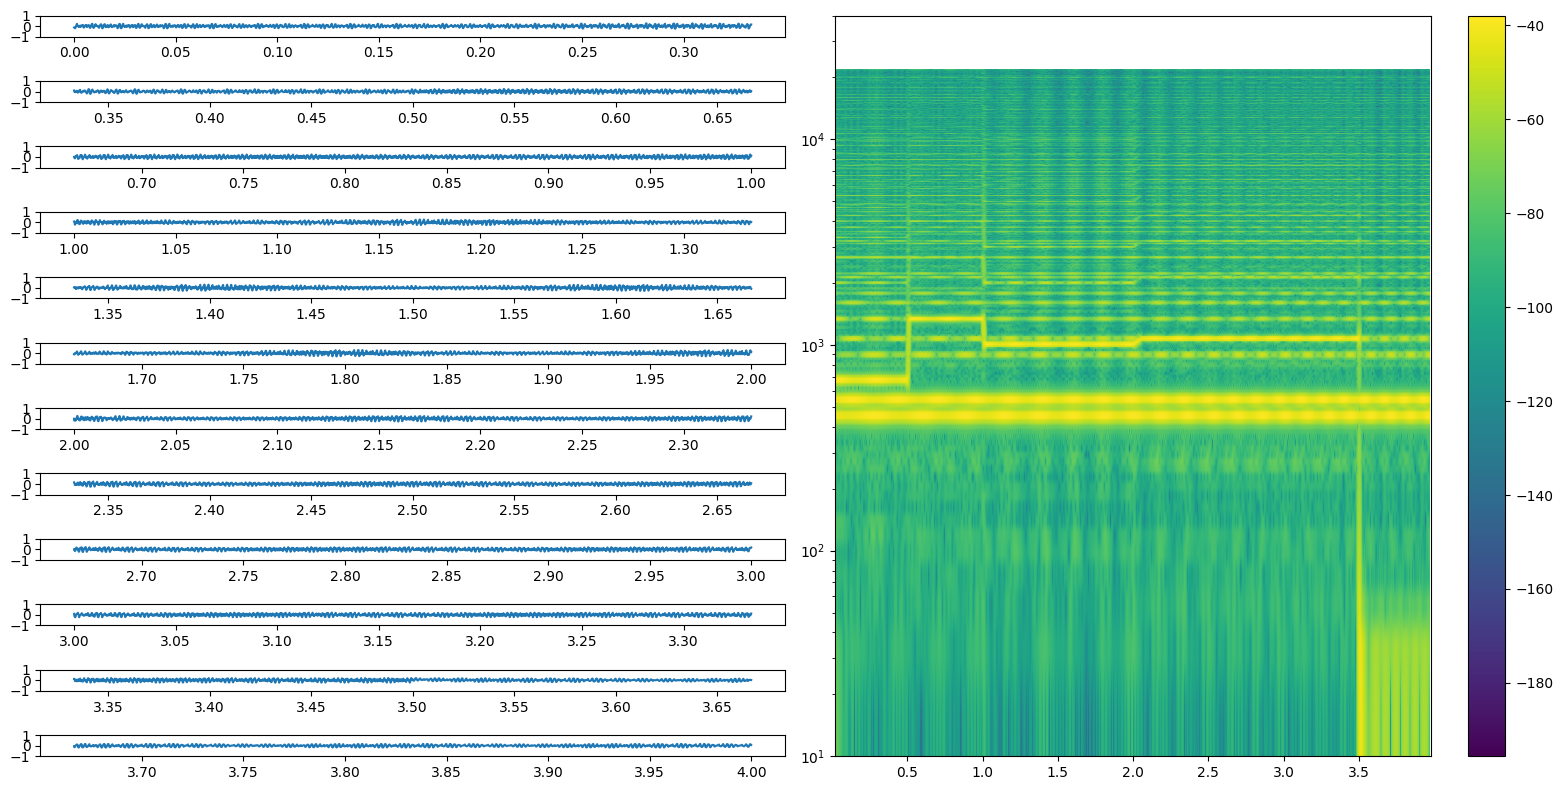

In [2]:
import numpy as np
wf1 = lambda x, t: (2 * x - 1) * np.exp(-(2 + wg.Sine(wg.PiecewiseLinear([0, 4], [2.5, 8])))(t) * (2 * x - 1)**2)
wf2 = lambda x, t: (2 * x - 1) * np.exp(-(2 + wg.Sine(wg.PiecewiseLinear([0, 4], [3, 8]), phase=0.33))(t) * (2 * x - 1)**2)
wf3 = lambda x, t: (2 * x - 1) * np.exp(-(2 + wg.Sine(wg.PiecewiseLinear([0, 4], [3.5, 8]), phase=0.67))(t) * (2 * x - 1)**2)
s = wg.Clip(
    (
        wg.Periodic(wf1, 440).gain(-9)
        + wg.Periodic(wf2, 440 * 6 / 5).gain(-9)
        + wg.Periodic(wf3, 440 * 3 / 2 * wg.PiecewiseLinear(
            [0.0, 0.5, 0.51, 1.0, 1.01, 2.0, 2.05, 3.5],
            [1.0, 1.0, 2.00, 2.0, 1.50, 1.5, 1.60, 1.6],
        )).gain(-9)
    ),
    -0, softness=0.2
).gain(-3)
s = wg.HPF(wg.LPF(s, 22000.0), 40.0)

fig = s.visualize(tmax=4)
s.to_audio(tmax=4)

In [3]:
def note(freq, generator, atk=0.005, dur=0.00001, decay=0.5):
    return generator(freq) * wg.PiecewiseLinear([0.0, atk, atk + dur, atk + dur + decay], [0.0, 1.0, 1.0, 0.0])

wf1 = lambda x, t: (2 * x - 1) * np.exp(-(2 + wg.Sine(wg.PiecewiseLinear([0, 4], [4, 3])))(t) * (2 * x - 1)**2)
wf2 = lambda x, t: (2 * x - 1) * np.exp(-(2 + wg.Sine(wg.PiecewiseLinear([0, 4], [4, 2.5]), phase=0.33))(t) * (2 * x - 1)**2)

generator = lambda freq: wg.Clip(
    wg.Periodic(wf1, freq).gain(-0) + wg.Periodic(wf2, freq * 3 / 2).gain(-15),
    -0, softness=0.2
).gain(-3)

s = (
    (
        wg.Clip(
            (
                wg.Clip(wg.Sine(220), -6 * (1 + 0.8 * wg.Sine(4.1, 0.3))).gain(-9)
                + wg.Clip(wg.Sine(220 * 6 / 5), -6 * (1 + 0.8 * wg.Sine(4))).gain(-9)
                + wg.Clip(wg.Sine(
                    220 * 3 / 2
                ), -6 * (1 + 0.8 * wg.Sine(3.9, 0.6))).gain(-9)
            ),
            -7.5, softness=0.2
        ).gain(-3) * wg.Pulse(0, 4)

        + note(440, generator)
        + wg.Delay(note(440 * 3 / 2, generator), 0.5)
        + wg.Delay(note(440 * 6 / 5, generator), 1.0)
        + wg.Delay(note(440 * 9 / 8, generator), 1.25)
        + wg.Delay(note(440 * 6 / 5, generator), 1.5)
        + wg.Delay(note(440 * 6 / 5, generator), 2.0)
        + wg.Delay(note(440 * 9 / 8, generator), 2.25)
        + wg.Delay(note(440 * 6 / 5, generator), 2.5)
        + wg.Delay(note(440 * 4 / 3, generator), 2.75)
        + wg.Delay(note(440 * 9 / 8, generator), 3.0)
        + wg.Delay(note(440 * 6 / 5, generator), 3.25)
        + wg.Delay(note(440, generator), 3.5)
    )
    + wg.Delay(
        (
            wg.Clip(
                (
                    wg.Clip(wg.Sine(220 * 8 / 9), -6 * (1 + 0.8 * wg.Sine(4.1, 0.3))).gain(-9)
                    + wg.Clip(wg.Sine(220 * 6 / 5), -6 * (1 + 0.8 * wg.Sine(4))).gain(-9)
                    + wg.Clip(wg.Sine(
                        220 * 3 / 2
                    ), -6 * (1 + 0.8 * wg.Sine(3.9, 0.6))).gain(-9)
                ),
                -7.5, softness=0.2
            ).gain(-3) * wg.Pulse(0, 4)

            + note(440, generator)
            + wg.Delay(note(440 * 3 / 2, generator), 0.5)
            + wg.Delay(note(440 * 6 / 5, generator), 1.0)
            + wg.Delay(note(440 * 9 / 8, generator), 1.25)
            + wg.Delay(note(440 * 6 / 5, generator), 1.5)
            + wg.Delay(note(440 * 6 / 5, generator), 2.0)
            + wg.Delay(note(440 * 9 / 8, generator), 2.25)
            + wg.Delay(note(440 * 6 / 5, generator), 2.5)
            + wg.Delay(note(440 * 4 / 3, generator), 2.75)
            + wg.Delay(note(440 * 9 / 8, generator), 3.0)
            + wg.Delay(note(440 * 6 / 5, generator), 3.25)
            + wg.Delay(note(440, generator), 3.5)
        ), 4
    )
)
s = wg.HPF(wg.LPF(s, 22000.0), 40.0)
s.to_audio(tmax=8.0)

In [4]:
s = wg.Sine(
    wg.PiecewiseLinear([0.5, 1.5], [100.0, 600.0], extend=True),
) + wg.Sine(
    wg.PiecewiseLinear([0.5, 1.5], [600.0, 100.0], extend=True),
)
s = wg.HPF(wg.LPF(wg.Limiter(s), 22000.0), 20.0)

s.to_audio(tmax=2.0)